In [40]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [41]:
#import csv files and change to dataframes
df_fees = pd.read_csv("project_dataset/extract - fees - data analyst - .csv")
df_cash_request = pd.read_csv("project_dataset/extract - cash request - data analyst.csv")

# 0.Muestra de datos generales

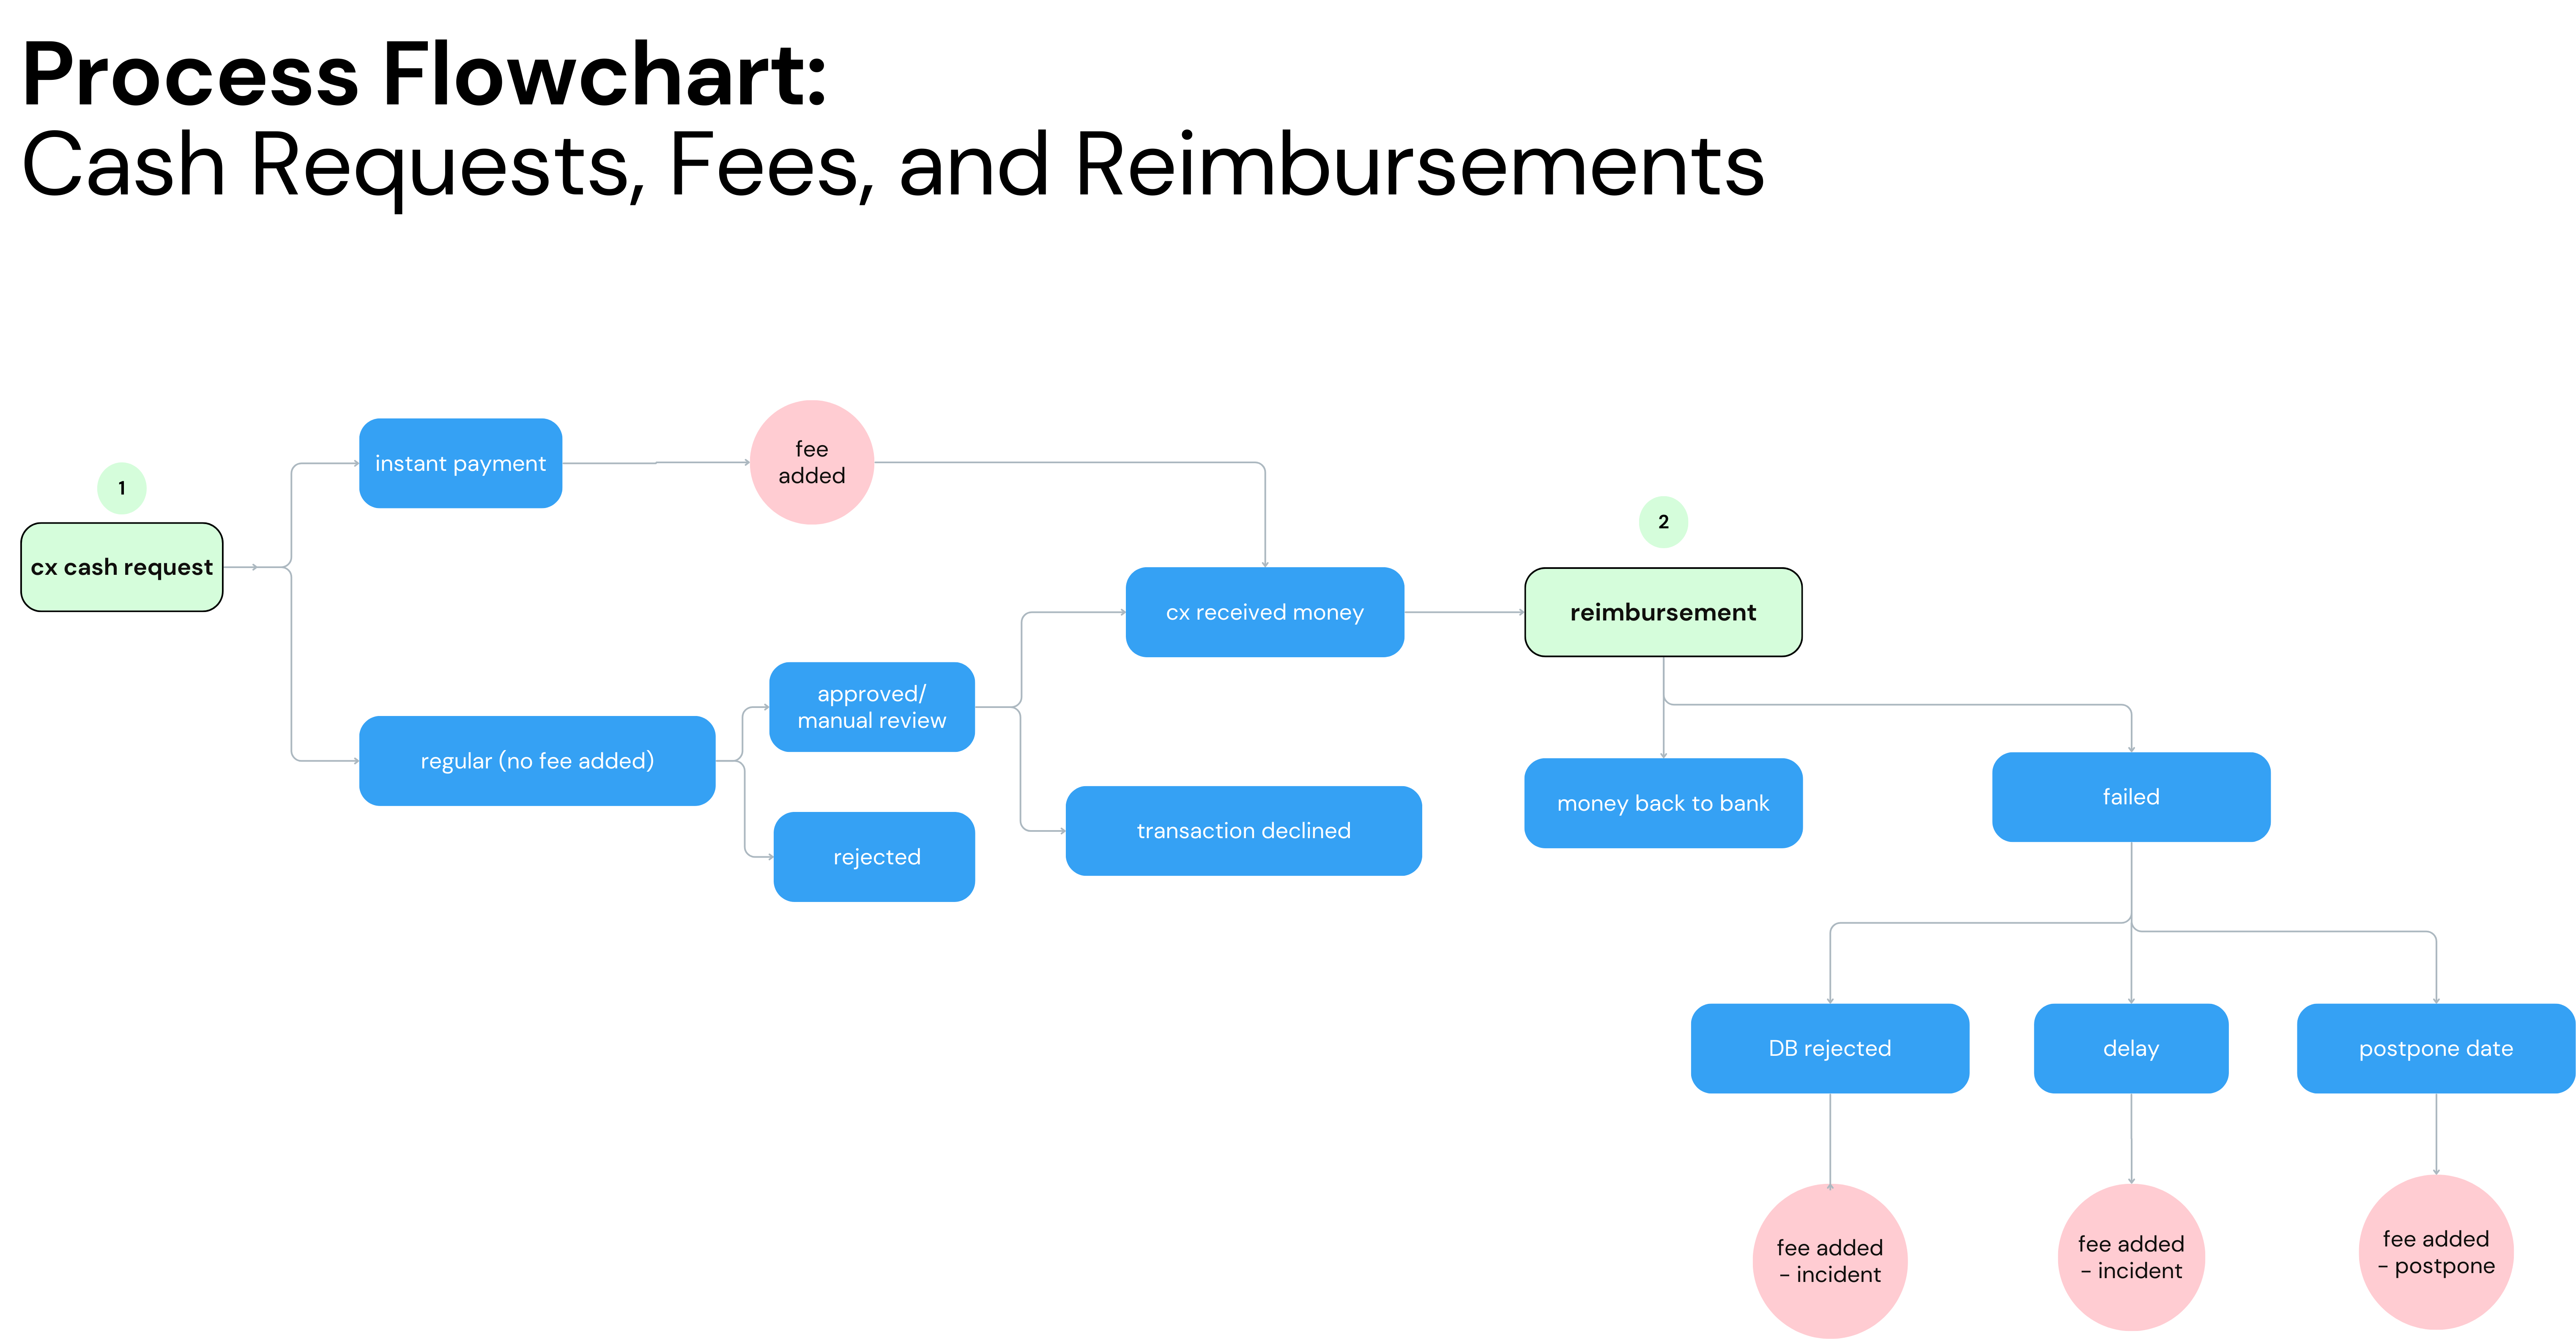

In [42]:
# import lexique
xls = pd.ExcelFile("project_dataset/Lexique - Data Analyst.xlsx")
df_xls_1 = pd.read_excel(xls, "context - fees")
df_xls_2 = pd.read_excel(xls, "context - cash request")

In [43]:
# show the full content of the lexique, two tabs seperately
pd.options.display.max_colwidth = 5000
df_xls_1.dropna()

,Column name,Description
0,id,Unique ID of the fee object
1,type,"Type of fee\nPossible values are :\n\n- instant_payment : fees for instant cash request (send directly after user's request, through SEPA Instant Payment) \n- split_payment : futures fees for split payment (in case of an incident, we'll soon offer the possibility to our users to reimburse in multiples installements)\n- incident : fees for failed reimbursement. Created after a failed direct debit\n- postpone : fees created when a user want to postpone the reimbursment of a CR"
2,status,"Status of the fees (= does the fees was successfully charged)\n\nPossibles values are : \n- confirmed : the user made an action who created a fee. It will normally get charged at the moment of the CR's reimbursement. In some rare cases, postpones are confirmed without being charges due to a commercial offer.\n- rejected : the last attempt to charge the fee failed.\n- cancelled : fee was created and cancelled for some reasons. It's used to fix issues with fees but it mainly concern postpone fees who failed. We are charging the fees at the moment of the postpone request. If it failed, the postpone is not accepted and the reimbursement date still the same.\n- accepted : fees were successfully charged"
3,category,Describe the reason of the incident fee.\n\n2 possibles values : \n\n- rejected_direct_debit : fees created when user's bank rejects the first direct debit\n- month_delay_on_payment : fees created every month until the incident is closed
4,reason,Description of the fee
5,created_at,Timestamp of the fee's creation
6,updated_at,Timestamp of the latest fee's details update
7,paid_at,Timestamp of the fee's payment
8,from_date,Apply only to postpone fees. Initial date of reimbursement for the CR
9,to_date,Apply only to postpone fees. New date of reimbursement for the CR


In [44]:
### heatmap to check null data

<Figure size 1200x800 with 0 Axes>

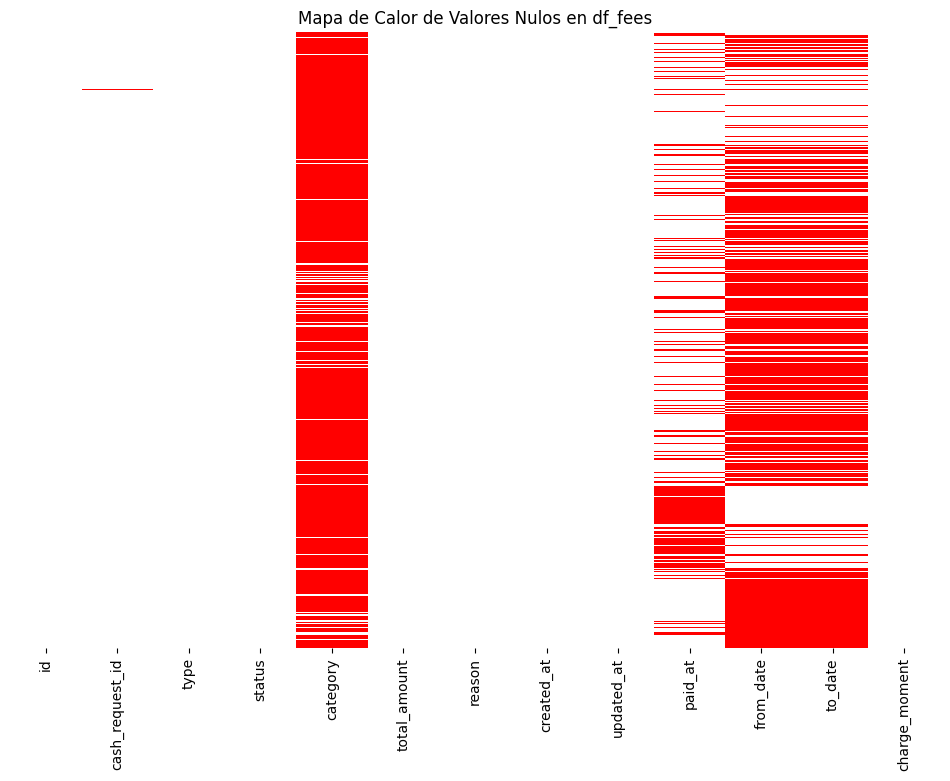

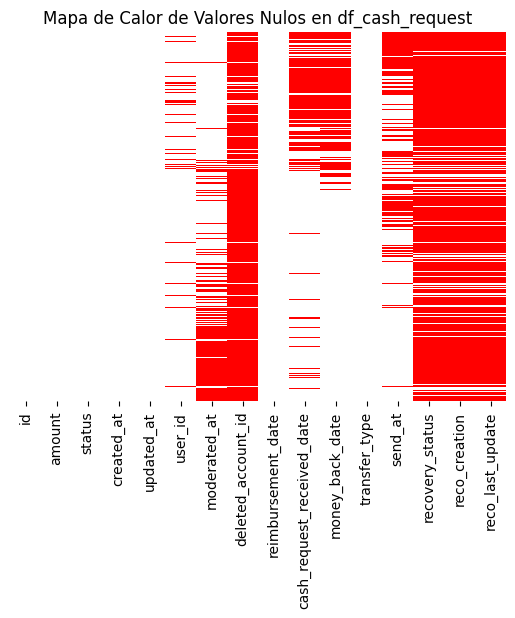

In [45]:
from matplotlib.colors import LinearSegmentedColormap

# Crear un DataFrame booleano donde True indica valores nulos
fees_data_null = df_fees.isnull()
cash_requests_null = df_cash_request.isnull()

# Definir un mapa de colores personalizado
colors = ["white", "red"]  # green para los valores False, red para los True
cmap = LinearSegmentedColormap.from_list("custom", colors, N=2)

# Configuración de la visualización
plt.figure(figsize=(12, 8))  # Ajusta el tamaño según tus necesidades

# Repetir para el DataFrame de fees
plt.figure(figsize=(12, 8))
sns.heatmap(fees_data_null, cbar=False, yticklabels=False, cmap=cmap)
plt.title('Mapa de Calor de Valores Nulos en df_fees')
plt.show()

# Crear el mapa de calor para el DataFrame de cash request
sns.heatmap(cash_requests_null, cbar=False, yticklabels=False, cmap=cmap)
plt.title('Mapa de Calor de Valores Nulos en df_cash_request')
plt.show()

<Figure size 1200x800 with 0 Axes>

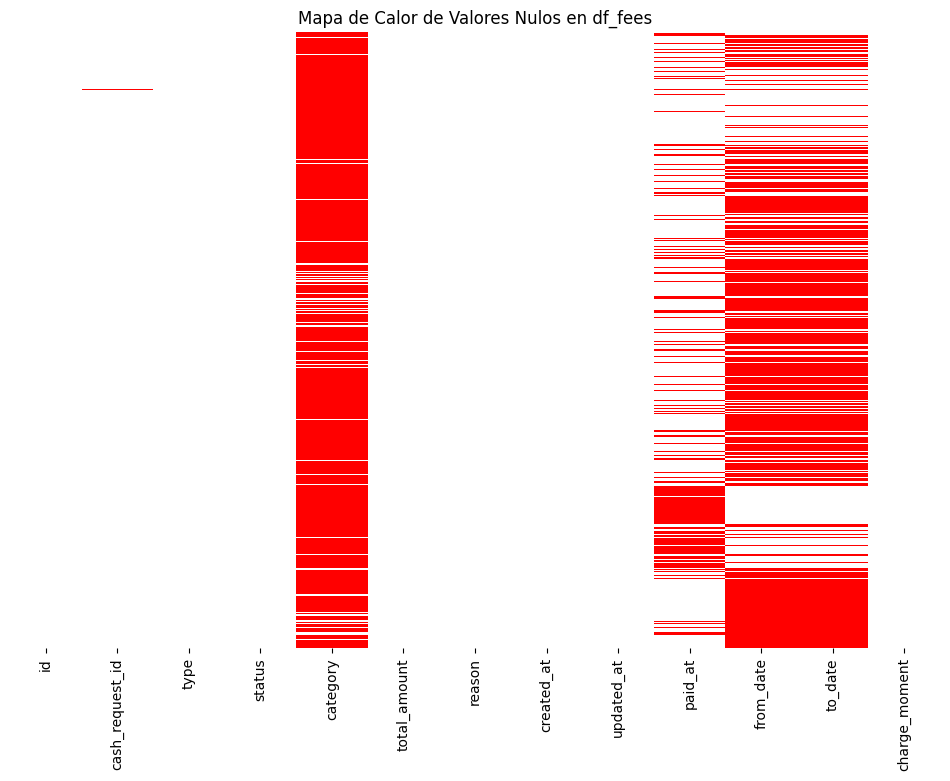

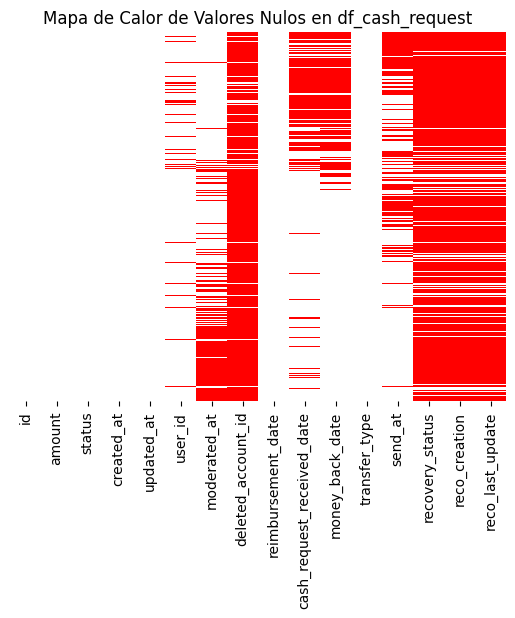

In [46]:
from matplotlib.colors import LinearSegmentedColormap

# Crear un DataFrame booleano donde True indica valores nulos
fees_data_null = df_fees.isnull()
cash_requests_null = df_cash_request.isnull()

# Definir un mapa de colores personalizado
colors = ["white", "red"]  # green para los valores False, red para los True
cmap = LinearSegmentedColormap.from_list("custom", colors, N=2)

# Configuración de la visualización
plt.figure(figsize=(12, 8))  # Ajusta el tamaño según tus necesidades

# Repetir para el DataFrame de fees
plt.figure(figsize=(12, 8))
sns.heatmap(fees_data_null, cbar=False, yticklabels=False, cmap=cmap)
plt.title('Mapa de Calor de Valores Nulos en df_fees')
plt.show()

# Crear el mapa de calor para el DataFrame de cash request
sns.heatmap(cash_requests_null, cbar=False, yticklabels=False, cmap=cmap)
plt.title('Mapa de Calor de Valores Nulos en df_cash_request')
plt.show()

# 1.Fees analysis

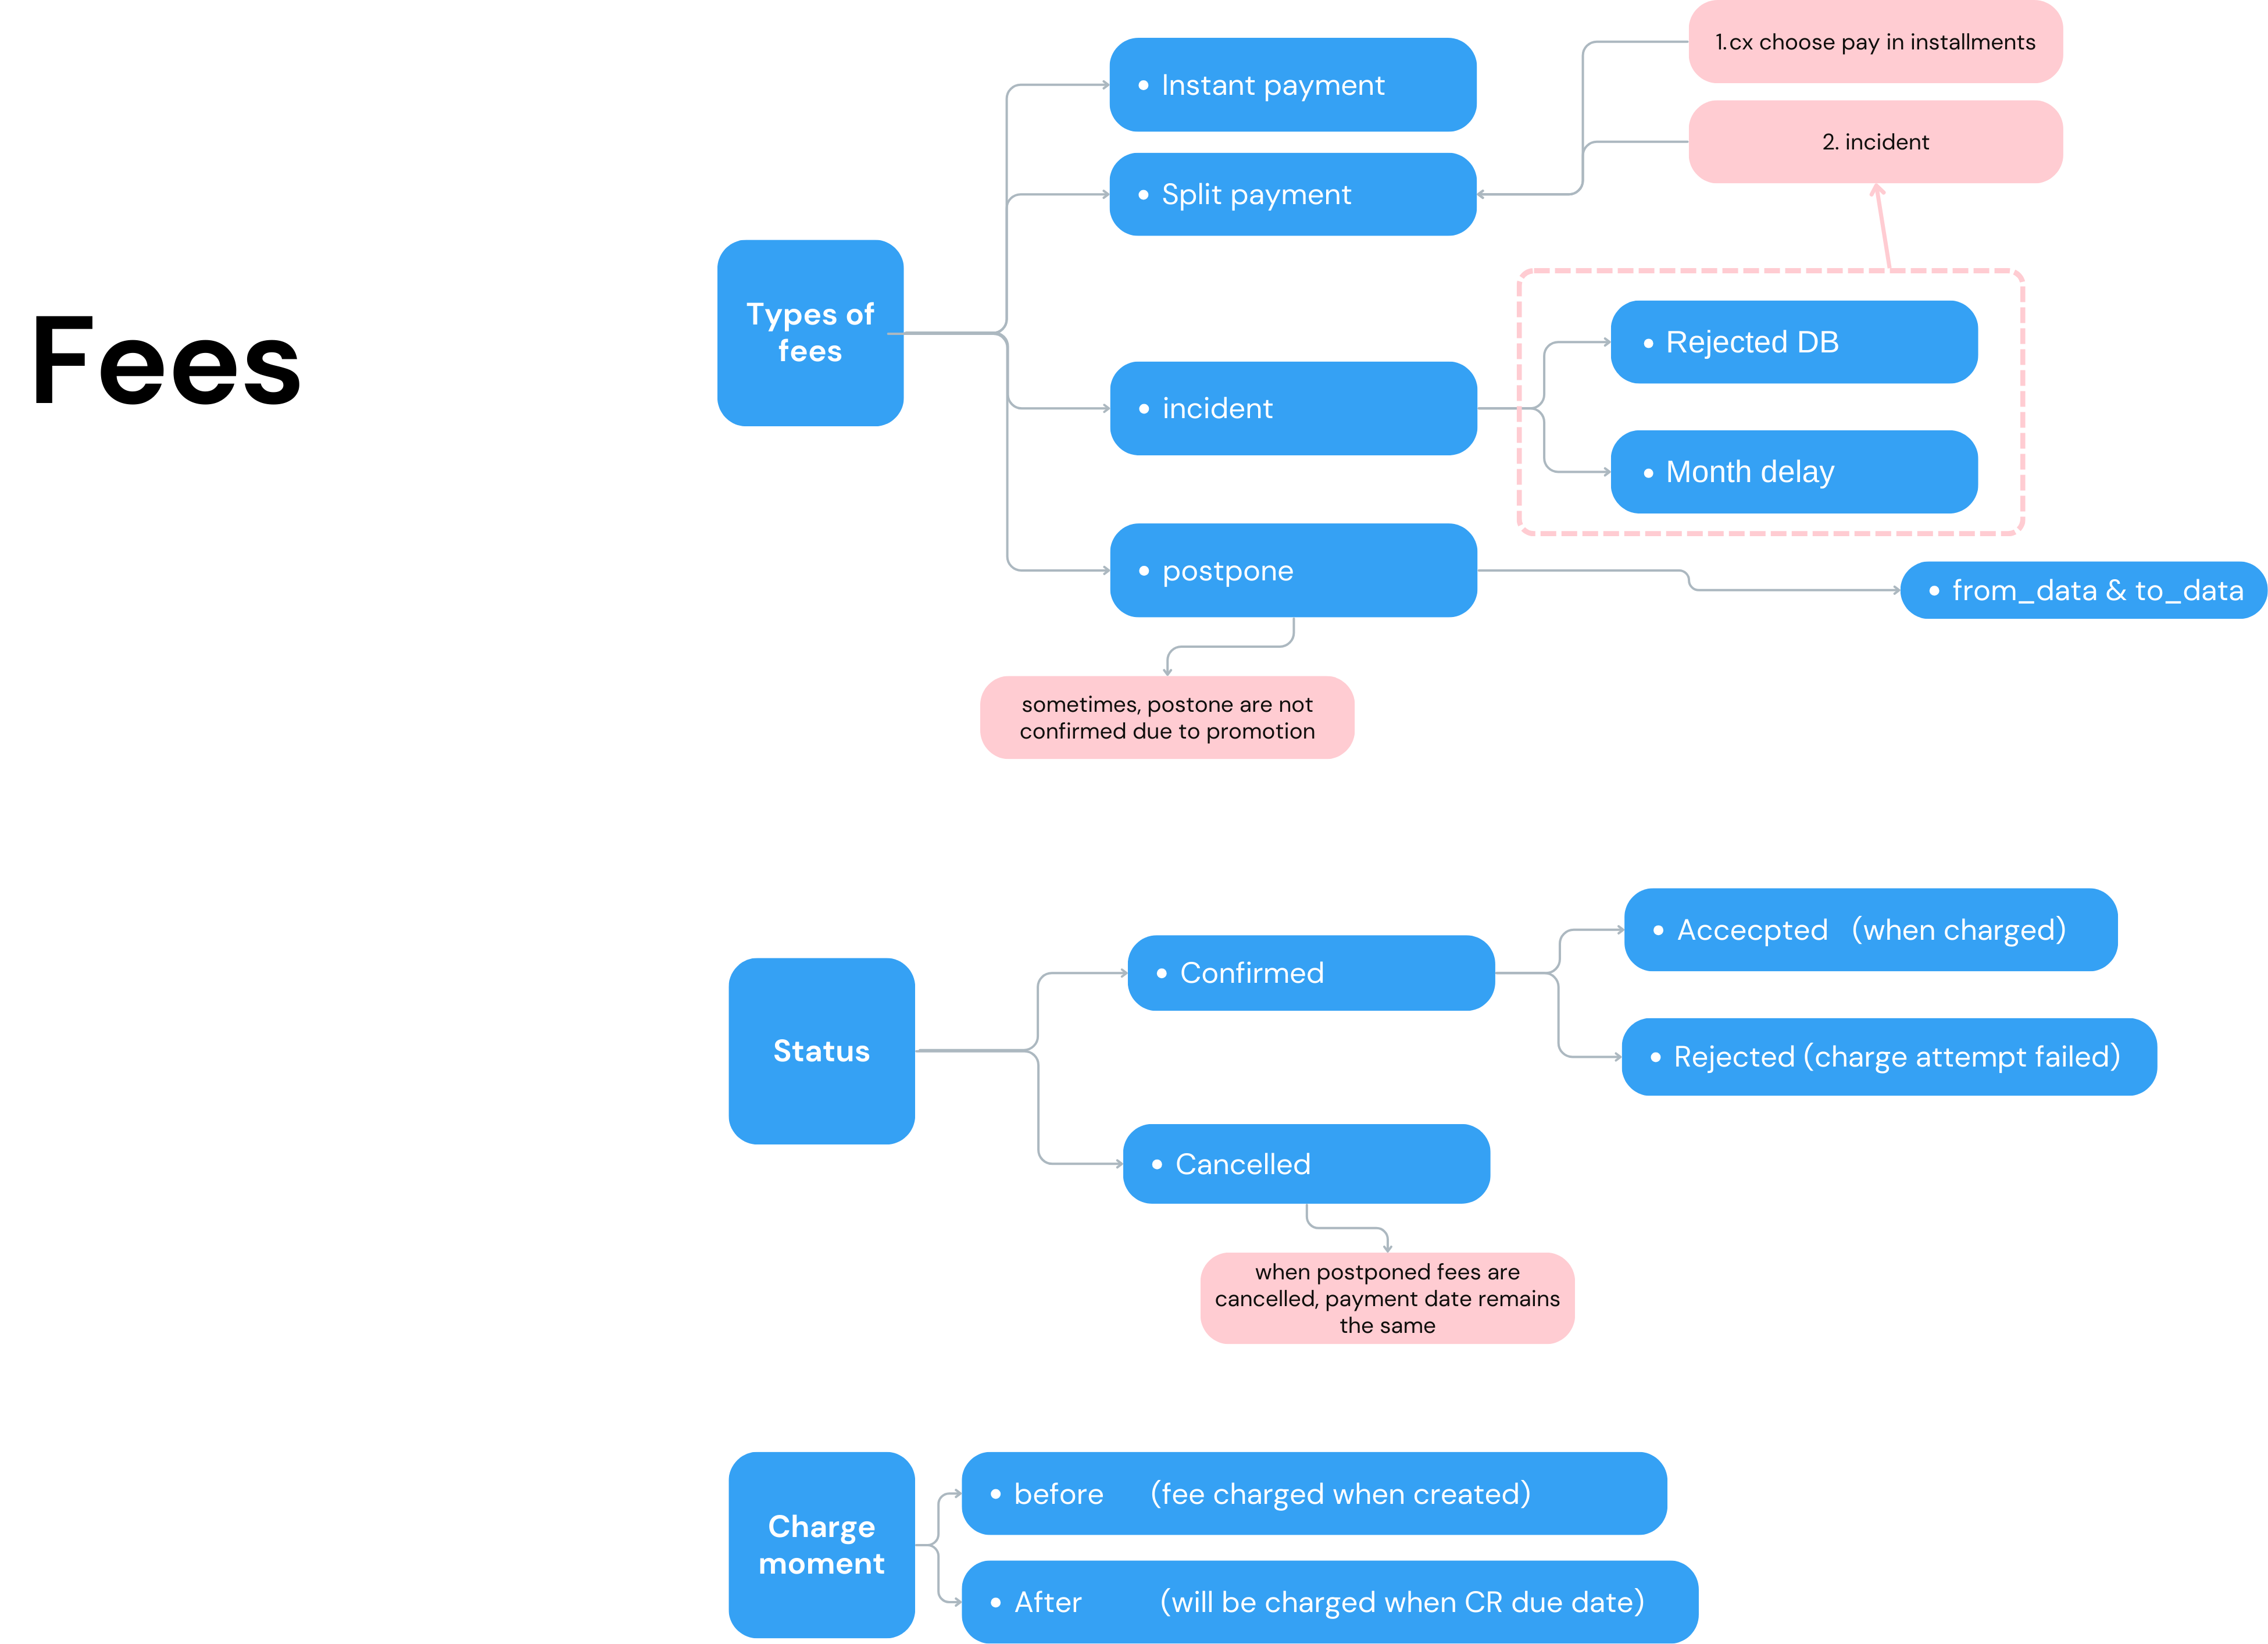

In [47]:
df_fees

,id,cash_request_id,type,status,category,total_amount,reason,created_at,updated_at,paid_at,from_date,to_date,charge_moment
0,6537,14941.0,instant_payment,rejected,NaN,5.0,Instant Payment Cash Request 14941,2020-09-07 10:47:27.42315+00,2020-10-13 14:25:09.396112+00,2020-12-17 14:50:07.47011+00,NaN,NaN,after
1,6961,11714.0,incident,accepted,rejected_direct_debit,5.0,rejected direct debit,2020-09-09 20:51:17.998653+00,2020-10-13 14:25:15.537063+00,2020-12-08 17:13:10.45908+00,NaN,NaN,after
2,16296,23371.0,instant_payment,accepted,NaN,5.0,Instant Payment Cash Request 23371,2020-10-23 10:10:58.352972+00,2020-10-23 10:10:58.352994+00,2020-11-04 19:34:37.43291+00,NaN,NaN,after
3,20775,26772.0,instant_payment,accepted,NaN,5.0,Instant Payment Cash Request 26772,2020-10-31 15:46:53.643958+00,2020-10-31 15:46:53.643982+00,2020-11-19 05:09:22.500223+00,NaN,NaN,after
4,11242,19350.0,instant_payment,accepted,NaN,5.0,Instant Payment Cash Request 19350,2020-10-06 08:20:17.170432+00,2020-10-13 14:25:03.267983+00,2020-11-02 14:45:20.355598+00,NaN,NaN,after
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21056,12372,20262.0,instant_payment,rejected,NaN,5.0,Instant Payment Cash Request 20262,2020-10-10 06:42:22.822743+00,2020-10-13 14:25:04.18049+00,2020-11-17 05:14:00.080854+00,NaN,NaN,after
21057,20768,26764.0,instant_payment,rejected,NaN,5.0,Instant Payment Cash Request 26764,2020-10-31 15:24:18.680694+00,2020-10-31 15:24:18.680715+00,2020-12-16 07:10:54.697639+00,NaN,NaN,after
21058,18779,25331.0,instant_payment,rejected,NaN,5.0,Instant Payment Cash Request 25331,2020-10-27 17:28:51.749177+00,2020-10-27 17:28:51.7492+00,2020-11-18 04:35:42.915511+00,NaN,NaN,after
21059,16542,23628.0,instant_payment,rejected,NaN,5.0,Instant Payment Cash Request 23628,2020-10-23 16:27:52.047457+00,2020-10-23 16:27:52.047486+00,2020-12-18 05:18:01.465317+00,NaN,NaN,after


In [48]:
df_fees.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21061 entries, 0 to 21060
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               21061 non-null  int64  
 1   cash_request_id  21057 non-null  float64
 2   type             21061 non-null  object 
 3   status           21061 non-null  object 
 4   category         2196 non-null   object 
 5   total_amount     21061 non-null  float64
 6   reason           21061 non-null  object 
 7   created_at       21061 non-null  object 
 8   updated_at       21061 non-null  object 
 9   paid_at          15531 non-null  object 
 10  from_date        7766 non-null   object 
 11  to_date          7766 non-null   object 
 12  charge_moment    21061 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 2.1+ MB


### 1.1.Formatting data type for fees df

In [49]:
# change data type to_datetime in df_fees
df_fees[["created_at", "updated_at", "paid_at", "from_date", "to_date"]] = \
    df_fees[["created_at", "updated_at", "paid_at", "from_date", "to_date"]].apply(pd.to_datetime, format="ISO8601")

df_fees.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21061 entries, 0 to 21060
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype              
---  ------           --------------  -----              
 0   id               21061 non-null  int64              
 1   cash_request_id  21057 non-null  float64            
 2   type             21061 non-null  object             
 3   status           21061 non-null  object             
 4   category         2196 non-null   object             
 5   total_amount     21061 non-null  float64            
 6   reason           21061 non-null  object             
 7   created_at       21061 non-null  datetime64[ns, UTC]
 8   updated_at       21061 non-null  datetime64[ns, UTC]
 9   paid_at          15531 non-null  datetime64[ns, UTC]
 10  from_date        7766 non-null   datetime64[ns, UTC]
 11  to_date          7766 non-null   datetime64[ns, UTC]
 12  charge_moment    21061 non-null  object             
dtypes: datetime64[ns

### 1.2.Distribution of type of fees

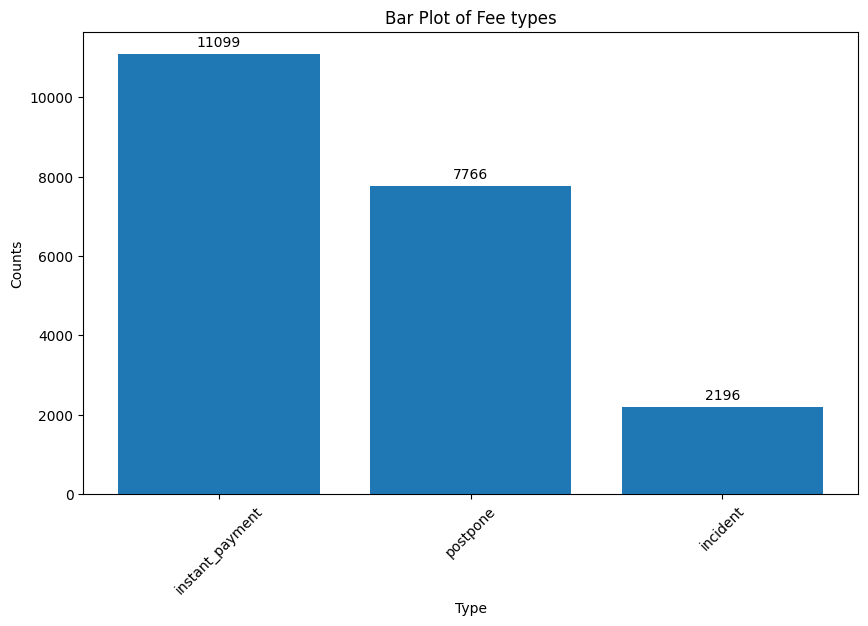

In [50]:
import matplotlib.pyplot as plt

# count four types in df_fees
type_count = df_fees["type"].value_counts()

# Extract types(x axis) and counts (as y axis)
types = type_count.index.tolist()
counts = type_count.tolist()

# create bar plot
plt.figure(figsize=(10,6))
bars = plt.bar(types, counts)

#Add counts on the top of each bar
for bar, count in zip(bars, counts):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 100, str(count), ha='center', va='bottom')

plt.title("Bar Plot of Fee types")
plt.xlabel("Type")
plt.ylabel("Counts")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

### 1.3.Distribution of status of fees

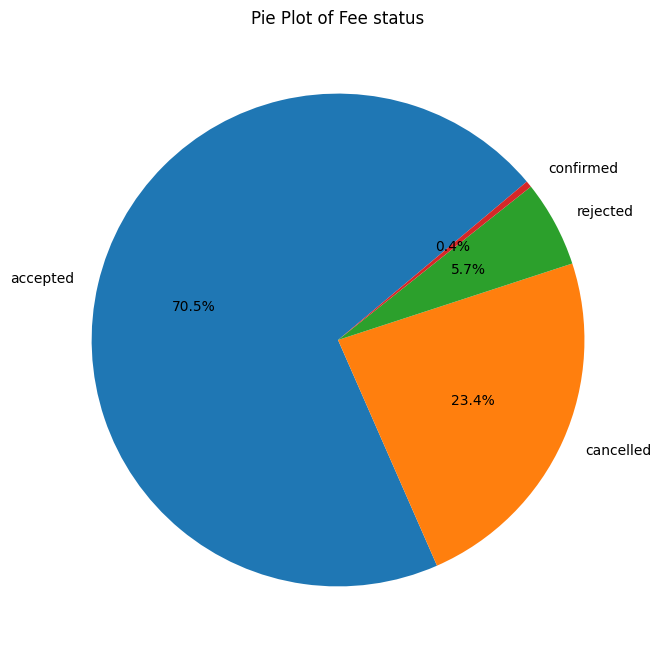

In [51]:
# count four types in df_fees
status_count = df_fees["status"].value_counts()

status = status_count.index.tolist()
counts2 = status_count.tolist()

# create bar plot
plt.figure(figsize=(8,8))
plt.pie(counts2, labels=status, autopct='%1.1f%%', startangle=40)
plt.title("Pie Plot of Fee status")

plt.show()

### 1.4.Distribution of Postpone Fees by Charge Moment

In [52]:
#check fees that has before for charge moment, in order to know what type of fees are they and what status they are at
df_fees[df_fees["charge_moment"] == "before"][["type", "status", "charge_moment"]].describe()

,type,status,charge_moment
count,4337,4337,4337
unique,1,3,1
top,postpone,accepted,before
freq,4337,2983,4337


In [53]:
print(df_fees[df_fees["charge_moment"] == "before"]["charge_moment"].count()/df_fees["charge_moment"].count())
# Observation:
# 21% of the fees created will be charged at the moment, and they are all postpone type
# the majority of them are accepted (68%)

0.20592564455628887


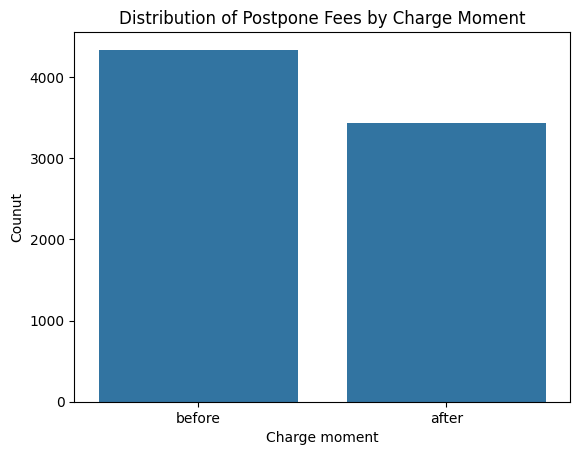

In [54]:
#Filter fees type, showing only postpone rows
postpone_df = df_fees[df_fees["type"] == "postpone"]

#create countplot with x showing values from charge_moment
sns.countplot(data = postpone_df,  x = "charge_moment")

#Add labels and title
plt.xlabel("Charge moment")
plt.ylabel("Counut")
plt.title("Distribution of Postpone Fees by Charge Moment")
plt.show()

In [55]:
df_fees["total_amount"].describe()
# Obervation:
# Amount of the fee is between 5 and 10, mean is about 5 and quite stable
df_fees[df_fees["total_amount"] == 10.0]
# Only one request is asked for 10 euros as fee (request id = 22799.0)

df_cash_request[df_cash_request["id"] == 22799] # find that request with the id in df_fees

,id,amount,status,created_at,updated_at,user_id,moderated_at,deleted_account_id,reimbursement_date,cash_request_received_date,money_back_date,transfer_type,send_at,recovery_status,reco_creation,reco_last_update
23689,22799,50.0,money_back,2020-10-21 13:01:03.763352+00,2020-12-18 13:15:58.632431+00,NaN,NaN,24579.0,2020-10-30 22:00:00+00,NaN,2020-11-02 23:00:00+00,instant,2020-10-21 13:01:33.298658+00,NaN,NaN,NaN


### 1.5.Gráfico de Barras para Estado de Transacción:

Import matplotlib.pyplot as plt

#### Contar la cantidad de transacciones en cada estado
estado_transaccion_counts = df_fees['status'].value_counts()

#### Crear el gráfico de barras
plt.figure(figsize=(8, 6))
estado_transaccion_counts.plot(kind='bar', color='skyblue')
plt.title('Cantidad de Transacciones por Estado')
plt.xlabel('Estado')
plt.ylabel('Cantidad')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Gráfico de Líneas para la Frecuencia de Transacciones por Fecha:

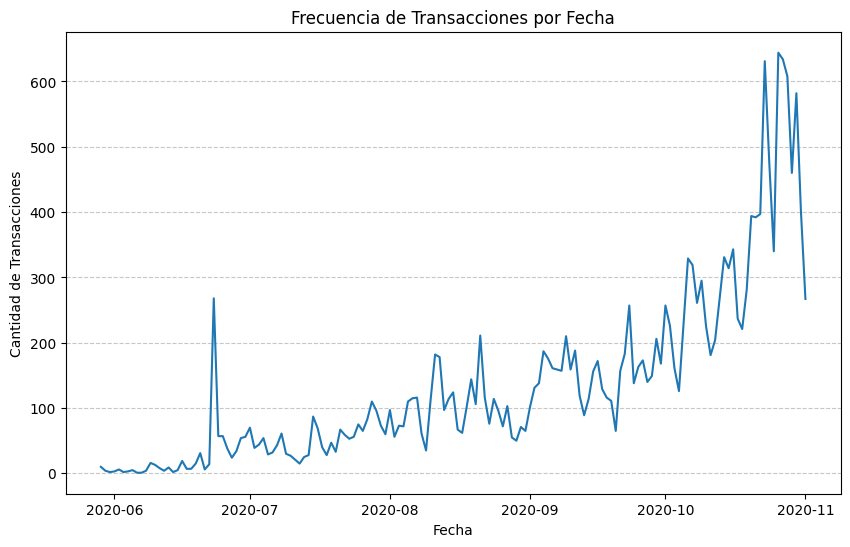

In [58]:
# Convertir las fechas a tipo datetime
df_fees['created_at'] = pd.to_datetime(df_fees['created_at'])

# Agrupar por fecha y contar la cantidad de transacciones
transacciones_por_fecha = df_fees.groupby(df_fees['created_at'].dt.date).size()

# Crear el gráfico de líneas
plt.figure(figsize=(10, 6))
transacciones_por_fecha.plot()
plt.title('Frecuencia de Transacciones por Fecha')
plt.xlabel('Fecha')
plt.ylabel('Cantidad de Transacciones')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### 1.6.Gráfico de Líneas para la Frecuencia de Transacciones por Fecha:

In [ ]:
# Contar la cantidad de transacciones en cada categoría
categoria_transaccion_counts = df_fees['category'].value_counts()

# Crear el gráfico de torta
plt.figure(figsize=(8, 6))
categoria_transaccion_counts.plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'lightgreen', 'orange', 'pink'])
plt.title('Proporción de Categorías de Transacciones')
plt.ylabel('')
plt.show()

# 2.Análisis Gráfico Exploratorio para df_cash_request:

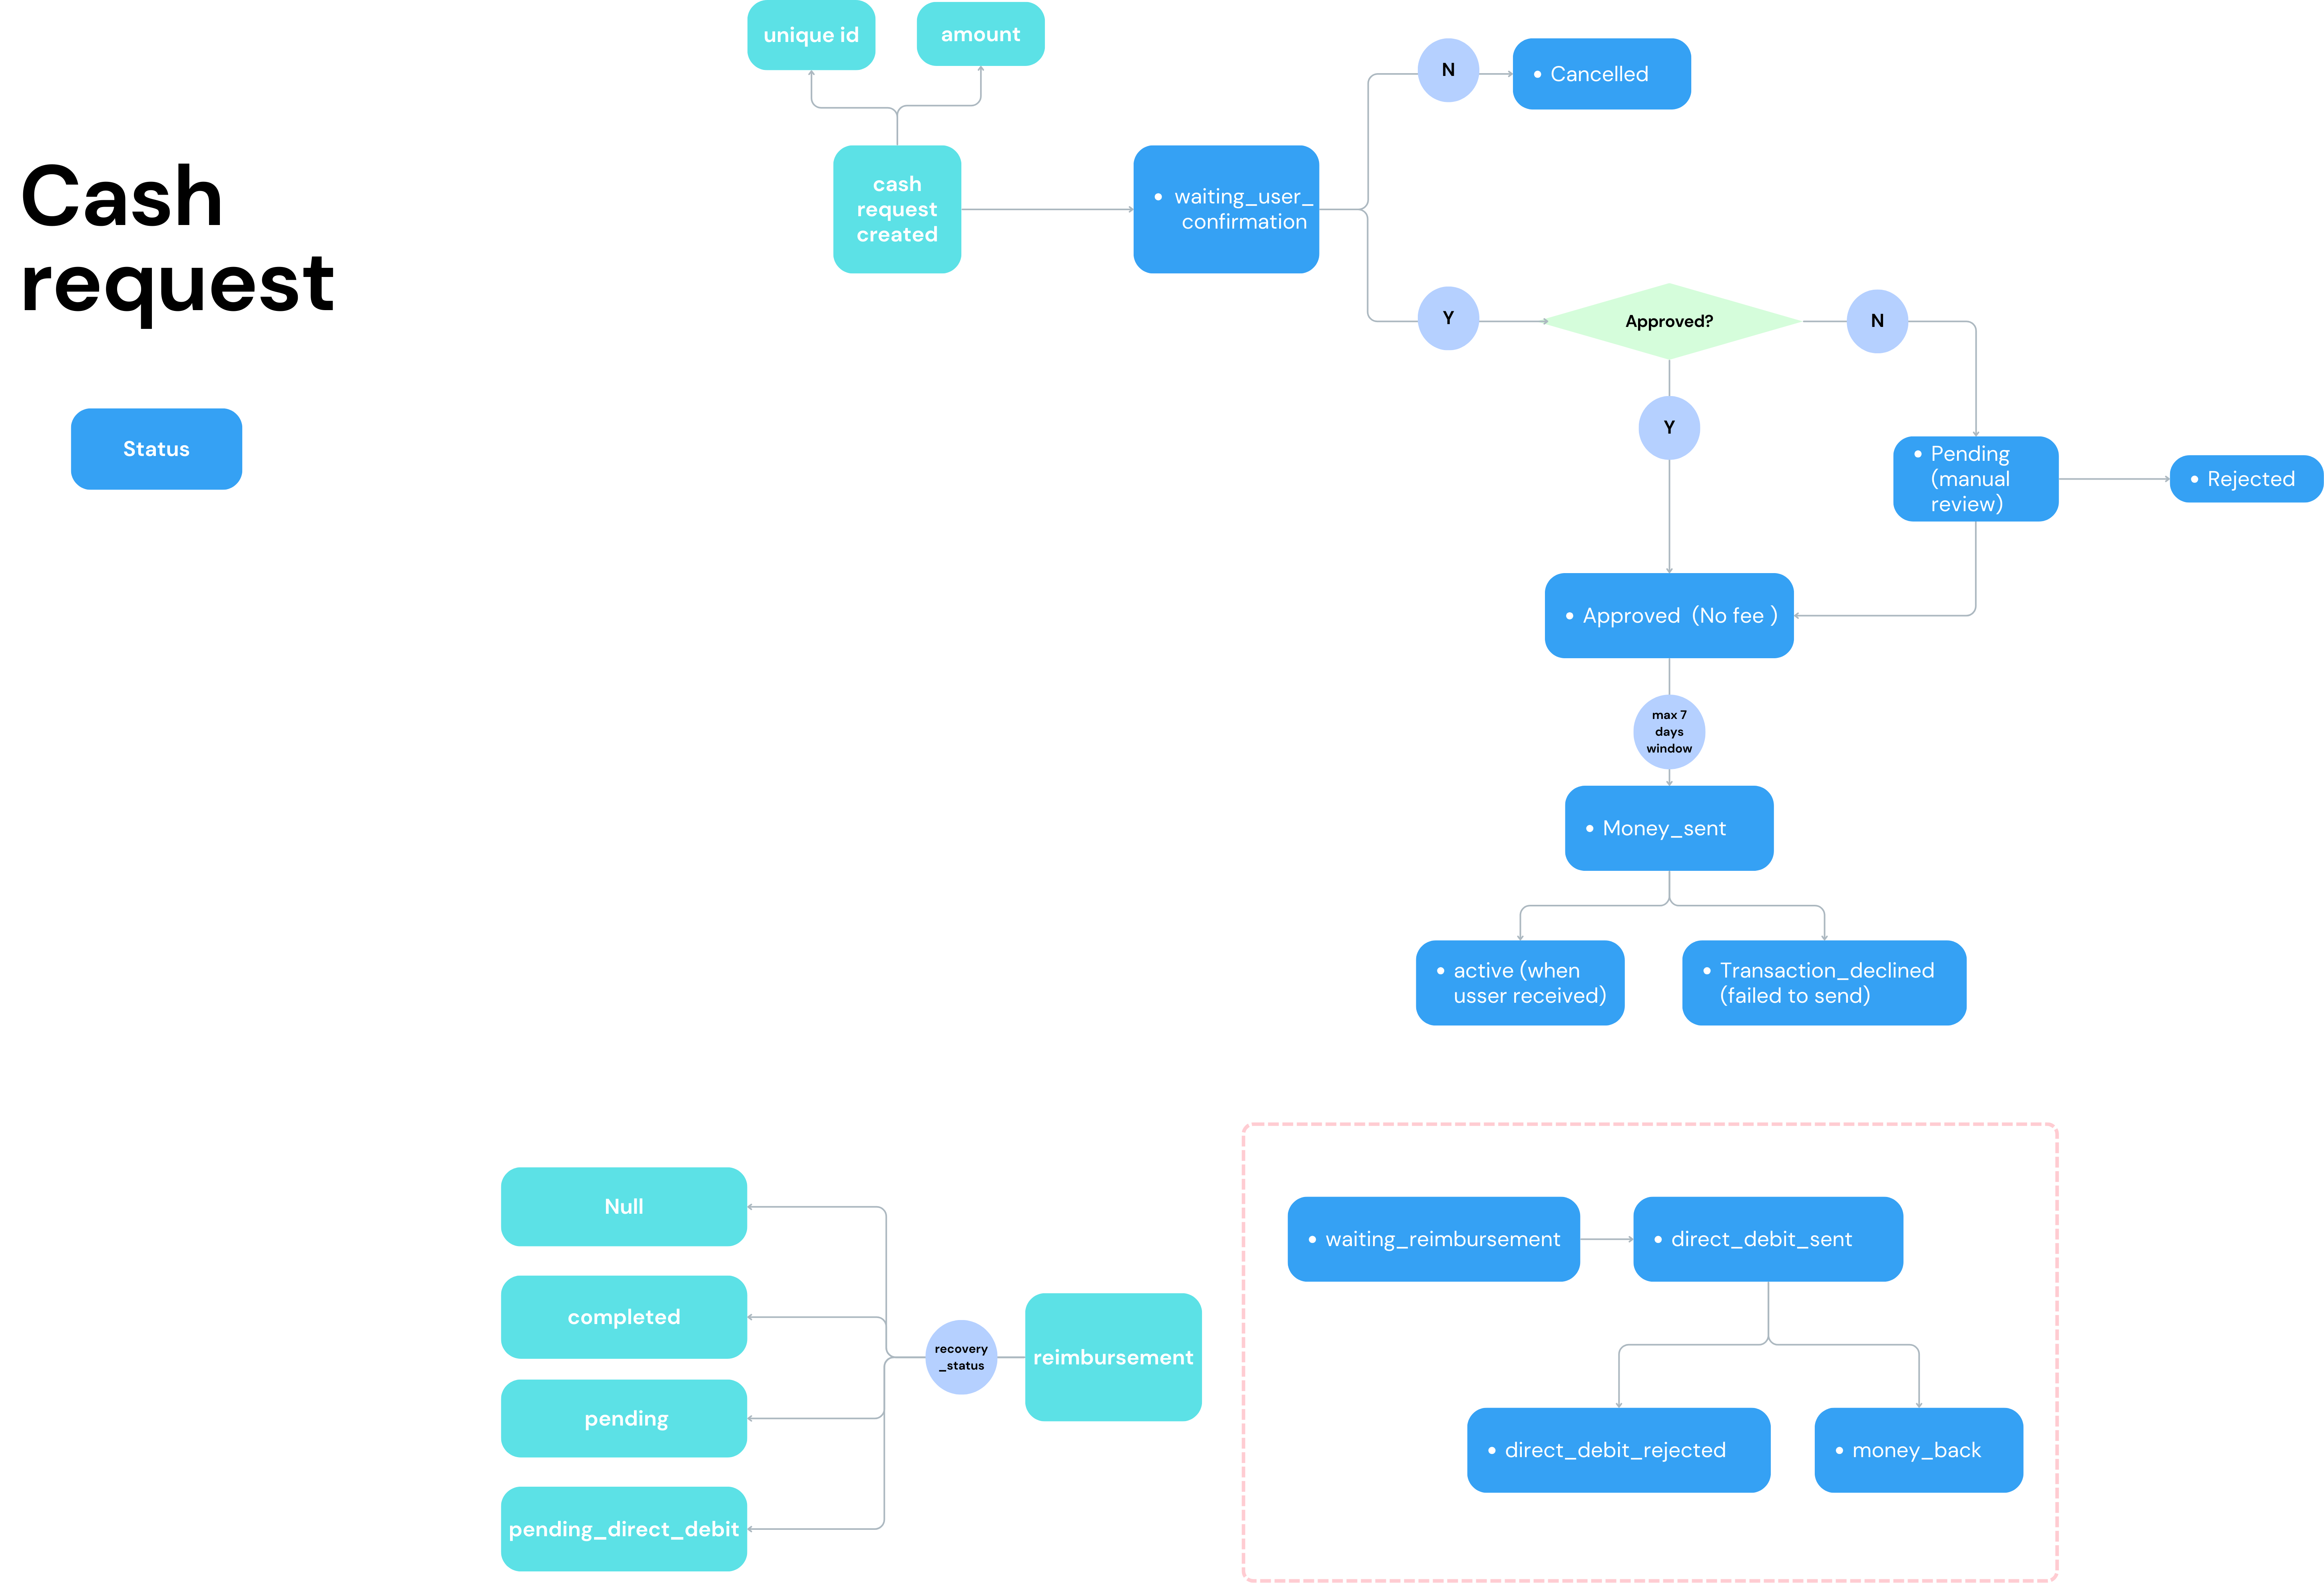

### 2.1.Distrubution of different status of cash requests type instant & type regular

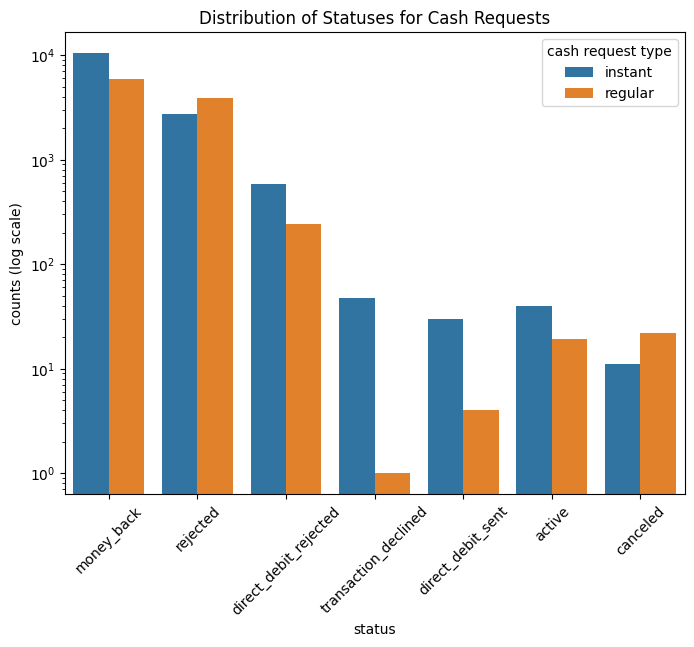

In [59]:
status_group_instant_cash = df_cash_request[df_cash_request["transfer_type"] == "instant"]
status_group_regular_cash = df_cash_request[df_cash_request["transfer_type"] == "regular"]

#concatanate two dataframes for both types of cash request
combined_cash_request_type =pd.concat([status_group_instant_cash, status_group_regular_cash])

#create count plot
plt.figure(figsize=(8,6))
sns.countplot(data=combined_cash_request_type, x= "status", hue= "transfer_type")
plt.yscale("log")  #set a logarithmic scale for the y-axis as the count range too large
plt.xlabel("status")
plt.ylabel("counts (log scale)")
plt.title("Distribution of Statuses for Cash Requests")
plt.xticks(rotation=45)
plt.legend(title = "cash request type")
plt.show()

In [60]:
df_cash_request[(df_cash_request["transfer_type"] == "instant") & (df_cash_request["status"] != "rejected")]

,id,amount,status,created_at,updated_at,user_id,moderated_at,deleted_account_id,reimbursement_date,cash_request_received_date,money_back_date,transfer_type,send_at,recovery_status,reco_creation,reco_last_update
48,23534,25.0,money_back,2020-10-23 15:20:26.163927+00,2020-12-18 13:08:29.099365+00,21465.0,NaN,NaN,2020-11-10 23:51:00+00,NaN,2020-11-06 07:16:21.845479+00,instant,2020-10-23 15:21:26.878525+00,NaN,NaN,NaN
161,20639,50.0,money_back,2020-10-12 16:05:27.478409+00,2020-12-18 13:12:06.313275+00,NaN,NaN,30317.0,2020-10-30 23:00:00+00,2020-10-16,2020-10-31 18:58:22.24451+00,instant,2020-10-15 06:29:31.161555+00,NaN,NaN,NaN
396,20108,100.0,money_back,2020-10-09 11:02:54.071547+00,2020-12-18 13:08:29.646333+00,63894.0,NaN,NaN,2020-11-06 11:00:00+00,2020-10-10,2020-11-06 19:27:38.913381+00,instant,2020-10-09 11:03:25.488796+00,NaN,NaN,NaN
487,20112,100.0,money_back,2020-10-09 11:12:35.190378+00,2020-12-18 13:08:29.86514+00,10116.0,NaN,NaN,2020-11-05 22:00:00+00,2020-10-10,2020-11-06 20:35:03.777445+00,instant,2020-10-09 11:12:41.849906+00,NaN,NaN,NaN
616,25766,50.0,money_back,2020-10-28 18:16:18.975577+00,2020-12-18 13:08:30.176523+00,97141.0,NaN,NaN,2020-11-06 23:51:00+00,2020-10-29,2020-11-07 19:54:45.149107+00,instant,2020-10-28 18:16:40.07432+00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23965,20616,100.0,money_back,2020-10-12 13:54:11.686225+00,2021-02-06 20:17:49.292493+00,13681.0,NaN,NaN,2021-02-06 11:00:00+00,2020-10-13,2021-02-06 20:17:49.257521+00,instant,2020-10-12 13:54:24.352856+00,NaN,NaN,NaN
23966,25243,50.0,money_back,2020-10-27 14:41:25.73491+00,2020-12-18 13:15:40.843946+00,NaN,NaN,30367.0,2020-11-03 22:00:00+00,2020-10-28,2020-12-01 13:26:53.787672+00,instant,2020-10-27 14:41:57.901946+00,completed,2020-11-12 23:20:41.928788+00,2020-12-01 13:26:53.815504+00
23967,22357,100.0,money_back,2020-10-20 07:58:04.006937+00,2021-02-05 12:19:30.656816+00,82122.0,NaN,NaN,2021-02-05 11:00:00+00,2020-10-21,2021-02-05 12:19:30.626289+00,instant,2020-10-20 07:58:14.171553+00,NaN,NaN,NaN
23968,20256,100.0,money_back,2020-10-10 05:40:55.700422+00,2021-02-05 13:14:19.707627+00,64517.0,NaN,NaN,2021-02-05 11:00:00+00,2020-10-12,2021-02-05 13:14:19.689906+00,instant,2020-10-10 05:41:23.368363+00,NaN,NaN,NaN


In [61]:
df_cash_request

,id,amount,status,created_at,updated_at,user_id,moderated_at,deleted_account_id,reimbursement_date,cash_request_received_date,money_back_date,transfer_type,send_at,recovery_status,reco_creation,reco_last_update
0,5,100.0,rejected,2019-12-10 19:05:21.596873+00,2019-12-11 16:47:42.40783+00,804.0,2019-12-11 16:47:42.405646+00,NaN,2020-01-09 19:05:21.596363+00,NaN,NaN,regular,NaN,NaN,NaN,NaN
1,70,100.0,rejected,2019-12-10 19:50:12.34778+00,2019-12-11 14:24:22.900054+00,231.0,2019-12-11 14:24:22.897988+00,NaN,2020-01-09 19:50:12.34778+00,NaN,NaN,regular,NaN,NaN,NaN,NaN
2,7,100.0,rejected,2019-12-10 19:13:35.82546+00,2019-12-11 09:46:59.779773+00,191.0,2019-12-11 09:46:59.777728+00,NaN,2020-01-09 19:13:35.825041+00,NaN,NaN,regular,NaN,NaN,NaN,NaN
3,10,99.0,rejected,2019-12-10 19:16:10.880172+00,2019-12-18 14:26:18.136163+00,761.0,2019-12-18 14:26:18.128407+00,NaN,2020-01-09 19:16:10.879606+00,NaN,NaN,regular,NaN,NaN,NaN,NaN
4,1594,100.0,rejected,2020-05-06 09:59:38.877376+00,2020-05-07 09:21:55.34008+00,7686.0,2020-05-07 09:21:55.320193+00,NaN,2020-06-05 22:00:00+00,NaN,NaN,regular,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23965,20616,100.0,money_back,2020-10-12 13:54:11.686225+00,2021-02-06 20:17:49.292493+00,13681.0,NaN,NaN,2021-02-06 11:00:00+00,2020-10-13,2021-02-06 20:17:49.257521+00,instant,2020-10-12 13:54:24.352856+00,NaN,NaN,NaN
23966,25243,50.0,money_back,2020-10-27 14:41:25.73491+00,2020-12-18 13:15:40.843946+00,NaN,NaN,30367.0,2020-11-03 22:00:00+00,2020-10-28,2020-12-01 13:26:53.787672+00,instant,2020-10-27 14:41:57.901946+00,completed,2020-11-12 23:20:41.928788+00,2020-12-01 13:26:53.815504+00
23967,22357,100.0,money_back,2020-10-20 07:58:04.006937+00,2021-02-05 12:19:30.656816+00,82122.0,NaN,NaN,2021-02-05 11:00:00+00,2020-10-21,2021-02-05 12:19:30.626289+00,instant,2020-10-20 07:58:14.171553+00,NaN,NaN,NaN
23968,20256,100.0,money_back,2020-10-10 05:40:55.700422+00,2021-02-05 13:14:19.707627+00,64517.0,NaN,NaN,2021-02-05 11:00:00+00,2020-10-12,2021-02-05 13:14:19.689906+00,instant,2020-10-10 05:41:23.368363+00,NaN,NaN,NaN


In [62]:
df_xls_2.dropna()

,Column name,Description
0,id,Unique ID of Cash Request
1,amount,Amount of the Cash Request
2,status,"Status of the CR.\nPossibles values are : \n- approved : CR is a 'regular' one (= without fees) and was approved either automatically or manually. Funds will be sent aprox. 7 days after the creation\n- money_sent : We transferred the fund to the customer account. Will change to active once we detect that the user received the funds (using user's bank history)\n- rejected : The CR needed a manual review and was rejected\n- pending : The CR is pending a manual review from an analyst\n- transaction_declined : We failed to send the funds to the customer\n- waiting_user_confirmation : The user needs to confirm in-app that he want the CR (for legal reasons)\n- direct_debit_rejected : Our last attempt of SEPA direct debit to charge the customer was rejected \n- canceled : The user didn't confirm the cash request in-app, we automatically canceled it\n- direct_debit_sent : We sent/scheduled a SEPA direct debit to charge the customer account. The result of this debit is not yet confirmed\n- waiting_reimbursement : We were not able to estimate a date of reimbursement, the user needs to choose one in the app.\n- active : Funds were received on the customer account.\n- money_back : The CR was successfully reimbursed."
3,reason,Filled only if the CR was manually reviewed and rejected. That's the rejection's reason displayed in-app.
4,created_at,Timestamp of the CR creation
5,updated_at,Timestamp of the latest CR's details update (= update of at least one column in this table)
6,user_id,Unique ID of the user who requested the cash advance
7,moderated_at,Timestamp of the manual review. Only filled if the CR needed a manual review
8,deleted_account_id,"If a user delete his account, we are replacing the user_id by this id. It corresponds to a unique ID in the deleted account table with some keys information saved for fraud-fighting purposes (while respecting GDPR regulation)"
9,reimbursement_date,Planned reimbursement date. The user card will be charged at this date.


### 2.2.Gráfico de Barras para el Estado de las Solicitudes

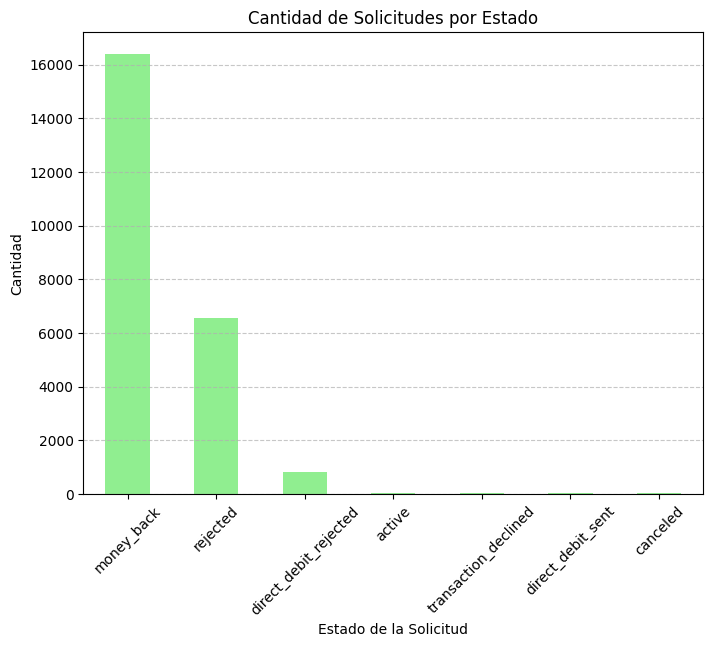

In [63]:
# Contar la cantidad de solicitudes en cada estado
estado_solicitud_counts = df_cash_request['status'].value_counts()

# Crear el gráfico de barras
plt.figure(figsize=(8, 6))
estado_solicitud_counts.plot(kind='bar', color='lightgreen')
plt.title('Cantidad de Solicitudes por Estado')
plt.xlabel('Estado de la Solicitud')
plt.ylabel('Cantidad')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### 2.3.Gráfico de Líneas para la Frecuencia de Solicitudes por Mes:

/var/folders/l8/nzfg4l2524n0y13740c8fkm40000gn/T/ipykernel_3345/4051944478.py:5: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  solicitudes_por_mes = df_cash_request.groupby(df_cash_request['created_at'].dt.to_period('M')).size()


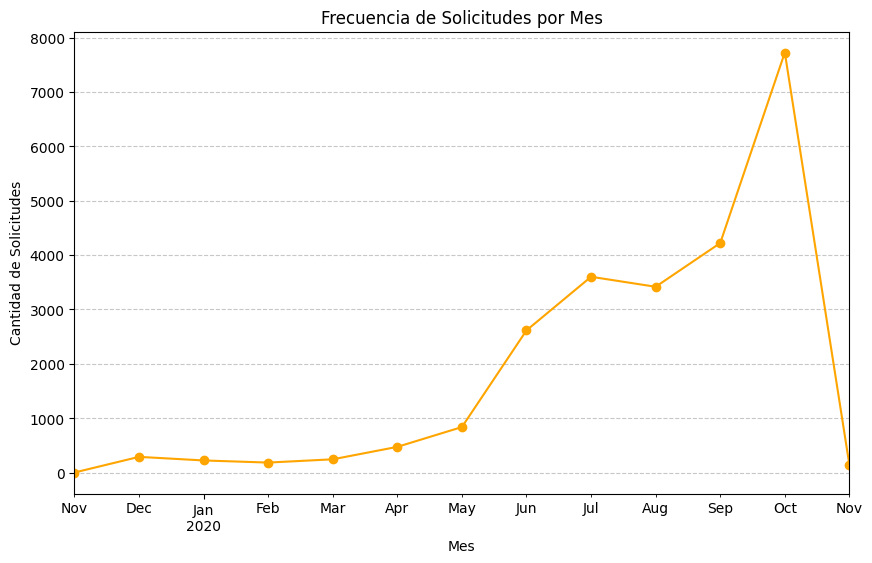

In [64]:
# Convertir las fechas a tipo datetime
df_cash_request['created_at'] = pd.to_datetime(df_cash_request['created_at'])

# Agrupar por mes y contar la cantidad de solicitudes
solicitudes_por_mes = df_cash_request.groupby(df_cash_request['created_at'].dt.to_period('M')).size()

# Crear el gráfico de líneas
plt.figure(figsize=(10, 6))
solicitudes_por_mes.plot(marker='o', color='orange')
plt.title('Frecuencia de Solicitudes por Mes')
plt.xlabel('Mes')
plt.ylabel('Cantidad de Solicitudes')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# 3.Análisis gráfico de relación entre ambos dataframe

### 3.1.Gráfico de Barras para Comparar el Estado de las Transacciones y el Estado de las Solicitudes:m

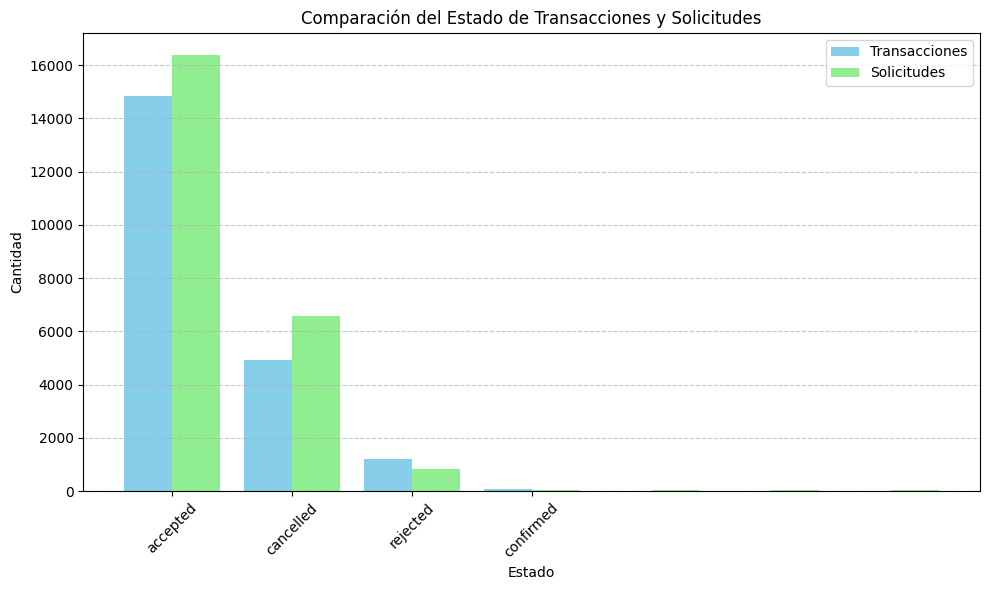

In [65]:
import numpy as np

# Contar la cantidad de transacciones en cada estado
estado_transaccion_counts = df_fees['status'].value_counts()

# Contar la cantidad de solicitudes en cada estado
estado_solicitud_counts = df_cash_request['status'].value_counts()

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))

# Gráfico para el DataFrame df_fees
plt.bar(np.arange(len(estado_transaccion_counts)) - 0.2, estado_transaccion_counts.values, width=0.4, color='skyblue', label='Transacciones')

# Gráfico para el DataFrame df_cash_request
plt.bar(np.arange(len(estado_solicitud_counts)) + 0.2, estado_solicitud_counts.values, width=0.4, color='lightgreen', label='Solicitudes')

plt.title('Comparación del Estado de Transacciones y Solicitudes')
plt.xlabel('Estado')
plt.ylabel('Cantidad')
plt.xticks(np.arange(len(estado_transaccion_counts)), estado_transaccion_counts.index, rotation=45)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### 3.2.Gráfico de Líneas para Comparar la Frecuencia de Transacciones y Solicitudes por Mes:

/var/folders/l8/nzfg4l2524n0y13740c8fkm40000gn/T/ipykernel_3345/2552734439.py:6: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  transacciones_por_mes = df_fees.groupby(df_fees['created_at'].dt.to_period('M')).size()
/var/folders/l8/nzfg4l2524n0y13740c8fkm40000gn/T/ipykernel_3345/2552734439.py:7: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  solicitudes_por_mes = df_cash_request.groupby(df_cash_request['created_at'].dt.to_period('M')).size()
/var/folders/l8/nzfg4l2524n0y13740c8fkm40000gn/T/ipykernel_3345/2552734439.py:10: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  fechas_completas = pd.date_range(start=min(df_fees['created_at'].min(), df_cash_request['created_at'].min()),
/var/folders/l8/nzfg4l2524n0y13740c8fkm40000gn/T/ipykernel_3345/2552734439.py:15: UserWarning: Converting to PeriodArray/Index representation will drop timezone inform

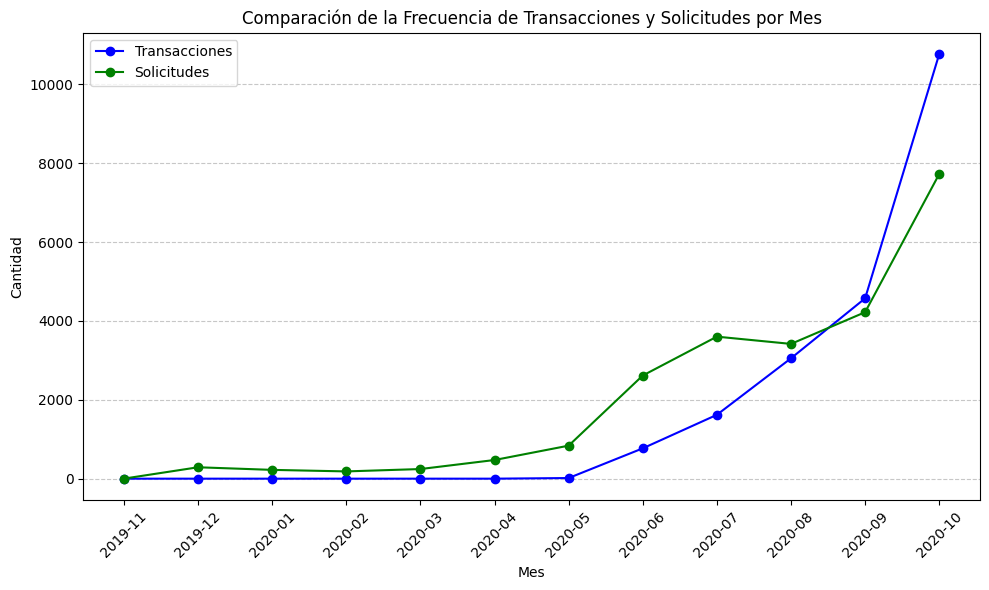

In [66]:
# Convertir las fechas a tipo datetime
df_fees['created_at'] = pd.to_datetime(df_fees['created_at'])
df_cash_request['created_at'] = pd.to_datetime(df_cash_request['created_at'])

# Agrupar por mes y contar la cantidad de transacciones y solicitudes
transacciones_por_mes = df_fees.groupby(df_fees['created_at'].dt.to_period('M')).size()
solicitudes_por_mes = df_cash_request.groupby(df_cash_request['created_at'].dt.to_period('M')).size()

# Crear un rango de fechas que incluya todas las fechas de ambos DataFrames
fechas_completas = pd.date_range(start=min(df_fees['created_at'].min(), df_cash_request['created_at'].min()),
                                 end=max(df_fees['created_at'].max(), df_cash_request['created_at'].max()),
                                 freq='M')

# Reindexar las series para incluir todas las fechas
transacciones_por_mes = transacciones_por_mes.reindex(fechas_completas.to_period('M'), fill_value=0)
solicitudes_por_mes = solicitudes_por_mes.reindex(fechas_completas.to_period('M'), fill_value=0)

# Crear el gráfico de líneas
plt.figure(figsize=(10, 6))

# Enumerar los meses y años para los ejes x
x_values = np.arange(len(transacciones_por_mes))

# Línea para las transacciones
plt.plot(x_values, transacciones_por_mes.values, marker='o', color='blue', label='Transacciones')

# Línea para las solicitudes
plt.plot(x_values, solicitudes_por_mes.values, marker='o', color='green', label='Solicitudes')

# Etiquetas de los ejes x
plt.xticks(x_values, fechas_completas.strftime('%Y-%m'), rotation=45)

plt.title('Comparación de la Frecuencia de Transacciones y Solicitudes por Mes')
plt.xlabel('Mes')
plt.ylabel('Cantidad')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()